# 5. Recurrent Structures in Neural Networks

Recurrence is not a new phenomenan


In [39]:
'''Trains a simple RNN-LSTM on sine waveform data.
'''
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import seed, random
%matplotlib inline

np.random.seed(1337)  # for reproducibility

# Simulate data
dates = pd.date_range(start='2009-01-01', end='2015-12-31', freq='D')
n = len(dates)
a = np.sin(np.arange(n) * 2 * np.pi / 7)
pdata = pd.DataFrame({"weather":a}, index=dates)
data = pdata
pdata.head()

,weather
2009-01-01,0.000000
2009-01-02,0.781831
2009-01-03,0.974928
2009-01-04,0.433884
2009-01-05,-0.433884


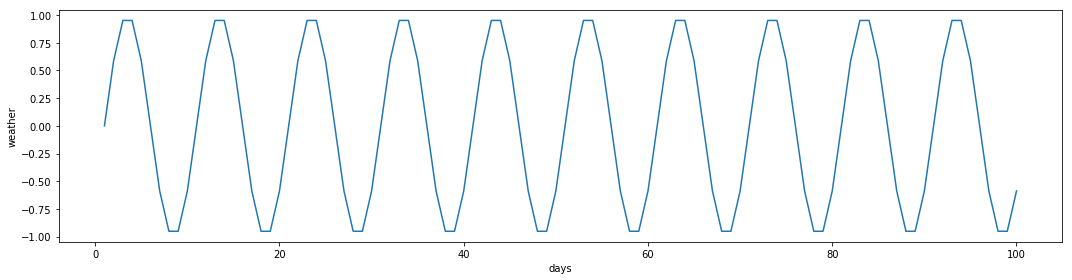

In [33]:
# visualize data
n_plot = 100
plt.figure(figsize=(15,4))
plt.plot(range(1, n_plot+1), data.weather[:n_plot])
plt.xlabel('days')
plt.ylabel('weather')
plt.tight_layout()
plt.show()

In [30]:
def _load_data(data, n_prev = 100):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].values)
        docY.append(data.iloc[i+n_prev].values)
    matX = np.array(docX)
    matY = np.array(docY)

    return matX, matY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    return (X_train, y_train), (X_test, y_test)

# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(data)

In [31]:
print (X_train.shape,y_train.shape)

(2200, 100, 1) (2200, 1)


In [5]:
# define model structure
in_out_neurons = 1
hidden_neurons = 300
model = Sequential()
model.add(LSTM(input_dim=in_out_neurons, output_dim=hidden_neurons, return_sequences=False))
model.add(Dense(output_dim=in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

/home/jaley/anaconda3/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/home/jaley/anaconda3/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, input_shape=(None, 1), units=300)`
  """
/home/jaley/anaconda3/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [6]:
# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, y_train, batch_size=50, nb_epoch=10, validation_split=0.05)

/home/jaley/anaconda3/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 2090 samples, validate on 110 samples
Epoch 1/10
2090/2090 [==============================] - 13s 6ms/step - loss: 0.0622 - val_loss: 0.0135
Epoch 2/10
2090/2090 [==============================] - 11s 5ms/step - loss: 0.0084 - val_loss: 0.0091
Epoch 3/10
2090/2090 [==============================] - 11s 5ms/step - loss: 0.0072 - val_loss: 0.0017
Epoch 4/10
2090/2090 [==============================] - 11s 5ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 5/10
2090/2090 [==============================] - 10s 5ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 6/10
2090/2090 [==============================] - 11s 5ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 7/10
2090/2090 [==============================] - 11s 5ms/step - loss: 0.0034 - val_loss: 0.0091
Epoch 8/10
2090/2090 [==============================] - 12s 6ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 9/10
2090/2090 [==============================] - 12s 6ms/step - loss: 0.0027 - val_loss: 9.2863e-05
Epoch 10/10
2090/2090 

In [7]:
# evaluate model fit
score = model.evaluate(X_test, y_test)
print('Test score:', score)

156/156 [==============================] - 0s 2ms/step
Test score: 0.004470178929085915


Text(0.5,1,'Test Actual Value and Prediction')

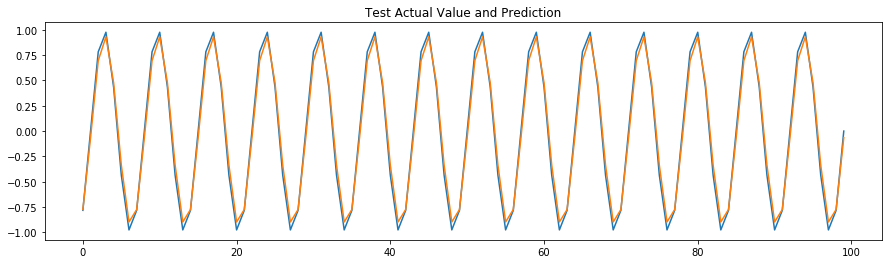

In [40]:
# visualize predictions
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

plt.figure(5, figsize=(15,4))
plt.plot(a[(len(a) - n_plot):len(a)])
plt.plot(test_prediction[:n_plot])
plt.title('Test Actual Value and Prediction')

In [16]:
print (train_prediction.shape)

(2200, 1)
